In [2]:
#Importing All the Needed Libraries
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


In [29]:
# Importing to a data frame.
df = pd.read_excel('lab1_planetry.xlsx')
print(df)

   wavelength   ref  sample1  sample2  sample3  sample4        u1        u2  \
0         470   940      298      149      197      122  0.022550  0.015610   
1         555   803      616      185      217      150  0.043810  0.020636   
2         585   825      636      179      202      205  0.043288  0.019685   
3         605   860      652      183      172      244  0.041778  0.019001   
4         635  1021      783      177      172      187  0.038314  0.015509   
5         660  1012      746      280      267      248  0.037418  0.019993   
6         695  1116     1130      460      477      526  0.044808  0.023987   
7         880  1008      666      912      847      893  0.034722  0.043519   
8         940   922      475      805      739      782  0.030779  0.044541   

         u3       u3b  
0  0.017927  0.014217  
1  0.022519  0.018620  
2  0.020969  0.021156  
3  0.018443  0.022204  
4  0.015299  0.015926  
5  0.019411  0.018670  
6  0.024559  0.026128  
7  0.041241  0.04

In [30]:
list_lambda = df["wavelength"].values
list_ref = df["ref"].values
list_samples = [df["sample1"].values,df["sample2"].values,df["sample3"].values,df["sample4"].values]
list_u = [df["u1"].values,df["u2"].values,df["u3"].values,df["u3b"].values]

dark_current = 35
print(list_lambda)

[470 555 585 605 635 660 695 880 940]


In [31]:
def reflectance_percentage(list_samples,list_ref,dark_current):
    reflect_fracctions = []
    for sample in list_samples:
        reflect = []
        reflect = (sample[:] - dark_current)/(list_ref[:]-dark_current)
        reflect_fracctions.append(reflect)
    return reflect_fracctions

In [32]:
reflect_fracctions = reflectance_percentage(list_samples,list_ref,dark_current)
print(reflect_fracctions)

[array([ 0.29060773,  0.75651042,  0.76075949,  0.74787879,  0.75862069,
        0.72773797,  1.01295097,  0.64850976,  0.49605411]), array([ 0.12596685,  0.1953125 ,  0.18227848,  0.17939394,  0.14401623,
        0.25076766,  0.39315449,  0.90133607,  0.8680947 ]), array([ 0.17900552,  0.23697917,  0.21139241,  0.16606061,  0.13894523,
        0.23746162,  0.40888067,  0.83453237,  0.79368658]), array([ 0.0961326 ,  0.14973958,  0.21518987,  0.25333333,  0.15415822,
        0.21801433,  0.45420907,  0.88180884,  0.8421646 ])]


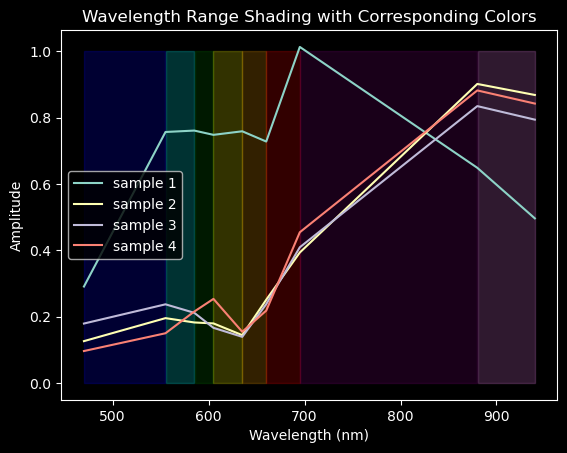

In [33]:
# Wavelength ranges and corresponding colors
wavelength_ranges = [(470, 555), (555, 585), (585, 605), (605, 635), (635, 660), 
                     (660, 695), (695, 880), (880, 940)]
colors = ['blue', 'cyan', 'green', 'yellow', 'orange', 'red', 'purple', 'violet']

# Wavelength range for the plot
x = np.linspace(470, 940, 1000)  # Generate wavelength values from 400 to 1000 nm
y = 1  # Example function to plot

# Apply shading to each wavelength range with corresponding color
for (start, end), color in zip(wavelength_ranges, colors):
    plt.fill_between(x, y, where=(x >= start) & (x <= end), color=color, alpha=0.2)#, label=f"{start}-{end} nm")



for i in enumerate(reflect_fracctions):
    plt.plot(list_lambda,i[1],label=f"sample {i[0]
    +1}")

# Labels and title
plt.xlabel('Wavelength (nm)')
plt.ylabel('Amplitude')
plt.title('Wavelength Range Shading with Corresponding Colors')
plt.legend()

# Show the plot
plt.show()

In [34]:
import colour
import matplotlib.colors as mcolors

def wavelength_to_hex(wavelength):
    # Convert wavelength to XYZ color space
    xyz = colour.wavelength_to_XYZ(wavelength)
    
    # Convert XYZ to RGB
    rgb = colour.XYZ_to_sRGB(xyz)
    
    # Ensure RGB values are within bounds (0, 1) and then scale to (0, 255)
    rgb = [max(0, min(1, c)) for c in rgb]
    rgb = [int(c * 255) for c in rgb]
    
    # Convert to hex
    hex_color = mcolors.to_hex([x / 255.0 for x in rgb])
    
    return hex_color

# Example: Convert 500 nm (greenish) to hex
wavelength = 500  # Wavelength in nanometers
hex_color = wavelength_to_hex(wavelength)
print(f"Wavelength {wavelength} nm corresponds to hex color {hex_color}")


Wavelength 500 nm corresponds to hex color #00cd81


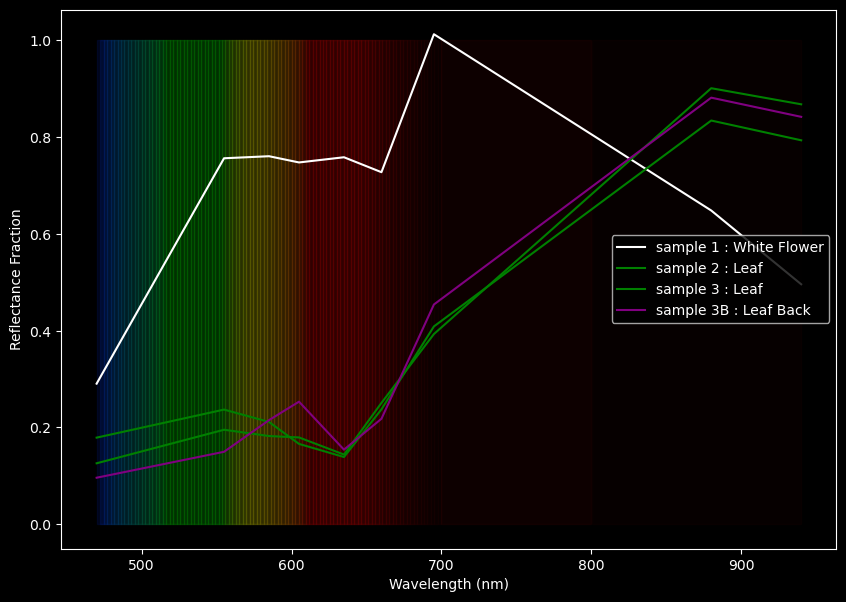

In [35]:
plt.style.use('dark_background')

# Wavelength range for the plot
x = np.linspace(470, 700, 100)  # Generate wavelength values from 400 to 1000 nm
y = 1  # Example function to plot

# Create a plot
fig, ax = plt.subplots(figsize=(10, 7))

# Loop over each color range and create a rectangle with the corresponding color
for i in range(len(x)-1):
    color = wavelength_to_hex(x[i])
    a = x[i]+1
    plt.fill_between(x, y, where=(x >= x[i]) & (x <= x[i]+5), color=color, alpha=0.1)

color_ranges = {

    'IRed': (700, 800),
    'IRed2': (800, 940)
}

# Define the corresponding colors
color_map = {
    'IRed': '#440000',
    'IRed2': '#220000'
}
# Wavelength range for the plot
x = np.linspace(470, 940, 1000)  # Generate wavelength values from 400 to 1000 nm
y = 1  # Example function to plot


# Loop over each color range and create a rectangle with the corresponding color
for color, (start_wl, end_wl) in color_ranges.items():
    plt.fill_between(x, y, where=(x >= start_wl) & (x <= end_wl), color=color_map[color], alpha=0.2)#, label=f"{start}-{end} nm")





plt.plot(list_lambda,reflect_fracctions[0],label=f"sample 1 : White Flower",color='White')
plt.plot(list_lambda,reflect_fracctions[1],label=f"sample 2 : Leaf ",color='Green')
plt.plot(list_lambda,reflect_fracctions[2],label=f"sample 3 : Leaf", color='Green')
plt.plot(list_lambda,reflect_fracctions[3],label=f"sample 3B : Leaf Back", color='Purple')



# Set the axis limits and labels

ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Reflectance Fraction")

#ax.set_yticks([])  # Remove y-axis ticks
ax.set_title("")

# Display the plot
plt.legend()
plt.show()

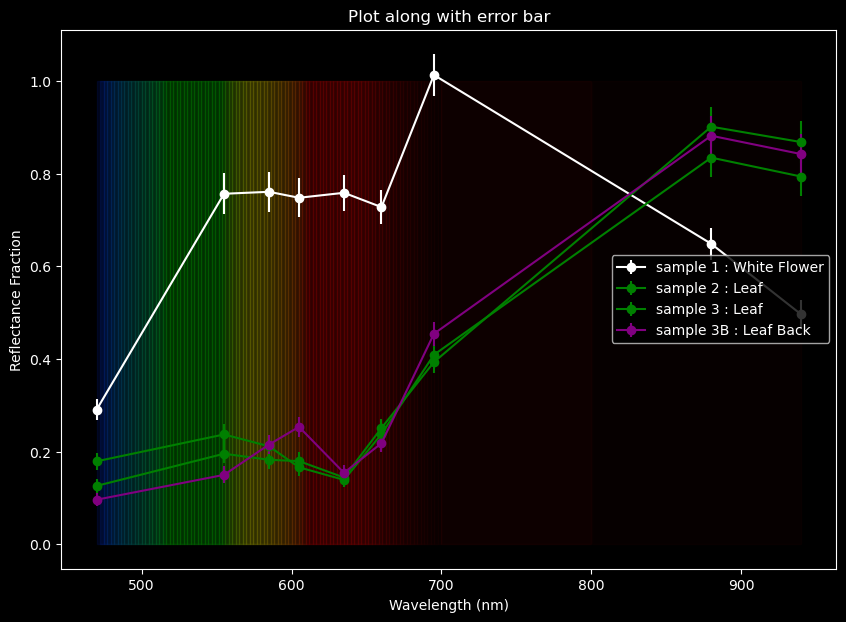

In [40]:
plt.style.use('dark_background')

# Wavelength range for the plot
x = np.linspace(470, 700, 100)  # Generate wavelength values from 400 to 1000 nm
y = 1  # Example function to plot

# Create a plot
fig, ax = plt.subplots(figsize=(10, 7))

# Loop over each color range and create a rectangle with the corresponding color
for i in range(len(x)-1):
    color = wavelength_to_hex(x[i])
    a = x[i]+1
    plt.fill_between(x, y, where=(x >= x[i]) & (x <= x[i]+5), color=color, alpha=0.1)

color_ranges = {

    'IRed': (700, 800),
    'IRed2': (800, 940)
}

# Define the corresponding colors
color_map = {
    'IRed': '#440000',
    'IRed2': '#220000'
}
# Wavelength range for the plot
x = np.linspace(470, 940, 1000)  # Generate wavelength values from 400 to 1000 nm
y = 1  # Example function to plot


# Loop over each color range and create a rectangle with the corresponding color
for color, (start_wl, end_wl) in color_ranges.items():
    plt.fill_between(x, y, where=(x >= start_wl) & (x <= end_wl), color=color_map[color], alpha=0.2)#, label=f"{start}-{end} nm")


plt.errorbar(list_lambda,reflect_fracctions[0],yerr=list_u[0],fmt='-o',label=f"sample 1 : White Flower",color='White')
plt.errorbar(list_lambda,reflect_fracctions[1],yerr=list_u[1],fmt='-o',label=f"sample 2 : Leaf ",color='Green')
plt.errorbar(list_lambda,reflect_fracctions[2],yerr=list_u[2],fmt='-o',label=f"sample 3 : Leaf", color='Green')
plt.errorbar(list_lambda,reflect_fracctions[3],yerr=list_u[3],fmt='-o',label=f"sample 3B : Leaf Back", color='Purple')



# Set the axis limits and labels

ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Reflectance Fraction")

#ax.set_yticks([])  # Remove y-axis ticks
plt.title("Plot along with error bar")

# Display the plot
plt.legend()
plt.savefig("err.png")
plt.show()

<Figure size 640x480 with 0 Axes>